# Aprendizaje supervisado

El objetivo de este es aprender una correspondencia entre un vector de una variable entrada y las variables de salida.

Para realizar el proceso de aprendizaje, se asume que existe un conjunto de instancias de entrada-salida, también conocidas como datos de entrenamiento.

## Scikit-Learn

Este es un paquete que contiene una API eficiente y uniforme para implementar numerosos métodos de aprendizaje automático (AA).

Los objetos fundamentales que tiene esta libreria son:

- **Estimadores:** Cualquier objeto que pueda estimar parámetros basados en un conjunto de datos se denomina **estimador**. Todos los estimadores implementan el método fit(), que acepta uno o dos argumentos como el aprendizaje supervisado, donde le segundo argumneto representa los valores objetivos:
    - estimador.fit(data, targets)
    - estimador.fit(data)
- **Transformadores:** Estos implementan el método transfrom() para realizar la transformacion de datos, como:
    - new_data = transfromer.transform(data)
    - También pueden implementar el método práctico conocido como fit_transform(), que es similar a llamar a fit() y transform()
        - new_data = transformer.fir_transform(data)
- **Predictores:** Estos puede realizar predicciones a partir de los datos. Se les conoce como predictores e implementan el método predict() para realizar la prediccion.
    - prediction = predictor.predict(data)
    - Por los general los algoritmos de clasificacion implementan:
        - probability = predictor.predict_proba(data)

---

# Clasificación de fores de iris

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
print(iris.DESCR[:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====


In [8]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50])

In [14]:
print(f"type of data {str(type(iris.data))}\ntype of target: {str(type(iris.target))}")

type of data <class 'numpy.ndarray'>
type of target: <class 'numpy.ndarray'>


In [16]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Conjunto de pruebas para la evaluación del modelo

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 100, test_size = 0.2, stratify = iris.target)

print(f"X_train_shape: {str(X_train.shape)}\nX_test_shape: {str(X_test.shape)}\ny_train_shape: {str(y_train.shape)}\n y_test_shape: {str(y_test.shape)}")

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
 y_test_shape: (30,)


In [20]:
np.bincount(y_train)

array([40, 40, 40])

## Visualización de datos

In [21]:
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=iris.feature_names)
y_train_df = pd.DataFrame(y_train, columns=["class"])
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)

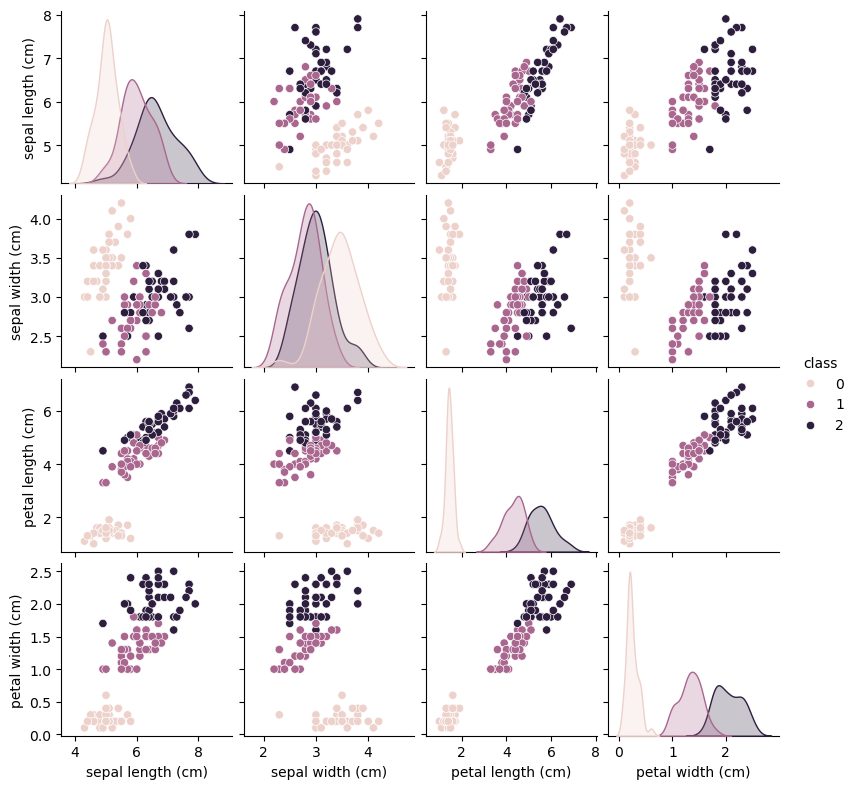

In [22]:
import seaborn as sns
sns.pairplot(X_y_train_df, hue="class", height=2)

Presenta el diagrama de dispersión de todos los pares de características

## Escalda de características (Normalización)

In [23]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = X_train - mean
X_train_scaled /= std
print(X_train_scaled)

[[-0.09321506 -1.12530064  0.12847063 -0.01411418]
 [ 0.02706244 -0.18591924  0.24099965  0.37673996]
 [ 0.74872744 -0.18591924  0.97243829  0.7675941 ]
 [ 0.98928243  0.04892611  0.35352867  0.24645525]
 [ 2.43261243  1.69284358  1.47881888  1.02816352]
 [ 2.19205743 -1.12530064  1.76014143  1.41901766]
 [ 0.02706244 -0.18591924  0.74738025  0.7675941 ]
 [-0.45404756 -1.59499135  0.01594161 -0.14439889]
 [ 0.14733994  0.75346217  0.40979318  0.50702467]
 [ 0.98928243  0.51861682  1.08496731  1.15844823]
 [-0.21349256  1.69284358 -1.16561311 -1.18667659]
 [ 1.10955993  0.28377147  1.19749633  1.41901766]
 [-0.21349256 -0.42076459  0.24099965  0.11617054]
 [-1.17571256 -1.36014599  0.40979318  0.63730938]
 [ 2.19205743 -0.18591924  1.31002535  1.41901766]
 [-0.57432506  0.75346217 -1.16561311 -1.3169613 ]
 [-0.45404756 -1.12530064  0.35352867 -0.01411418]
 [-1.53654506  0.75346217 -1.33440664 -1.18667659]
 [ 1.22983743  0.04892611  0.63485122  0.37673996]
 [-0.09321506 -0.89045529  0.18

In [24]:
X_train_scaled.mean(axis=0)

array([-4.21884749e-16,  1.20042865e-16, -3.88578059e-16, -7.04991621e-16])

In [26]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [28]:
X_test_scaled = X_test - mean
X_test_scaled /= std

print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
StandardScaler()

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled.mean(axis=0))

print(X_test_scaled.std(axis=0))

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


In [32]:
import numpy as np
np.savez('data/iris_train_scaled', X = X_train_scaled, y = y_train)
np.savez('data/iris_test_scaled', X = X_test_scaled, y = y_test)

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris_train_scaled.npz'

## Entrenamiento del modelo

In [33]:
from sklearn.neighbors import KNeighborsClassifier as kNN, KNeighborsClassifier  # giving an alias kNN for simplicity
knn = kNN(n_neighbors=3) # hyperparameter k is set to 3; that is, we have 3NN

In [35]:
knn.fit(X_train_scaled, y_train)
KNeighborsClassifier(n_neighbors=3)

NameError: name 'KNeighborsClassifier' is not defined

## Predicción usando el modelo entrenado

In [36]:
x_test = np.array([[5.5, 2, 1.1, 0.6]]) # same as: np.array([5.5, 2, 1.1, 0.6]).reshape(1,4)
x_test.shape

(1, 4)

In [37]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-0.45404756, -2.53437275, -1.50320017, -0.79582245]])

In [39]:
y_test_prediction = knn.predict(x_test_scaled)
print('knn predicts: ' + str(iris.target_names[y_test_prediction])) # to convert the prediction (y_test_prediction) to the names of Iris flower

knn predicts: ['versicolor']


In [40]:
y_test_predictions = knn.predict(X_test_scaled)
print('knn predicts: ' + str(iris.target_names[y_test_predictions])) # fancy indexing

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


In [41]:
y_test_predictions = kNN(n_neighbors=3).fit(X_train_scaled, y_train).predict(X_test_scaled)
print('knn predicts: ' + str(iris.target_names[y_test_predictions]))

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


## Evaluación del model (Estimación de errores)

In [42]:
errors = (y_test_predictions != y_test)
errors

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [43]:
error_est = sum(errors)/errors.size
print('The error rate estimate is: {:.2f}'.format(error_est) + '\n' + 'The accuracy is: {:.2f}'.format(1-
error_est))

The error rate estimate is: 0.10
The accuracy is: 0.90


In [44]:
from sklearn.metrics import accuracy_score
print('The accuracy is {:.2f}'.format(accuracy_score(y_test, y_test_predictions)))

The accuracy is 0.90


In [45]:
print('The accuracy is {:.2f}'.format(knn.score(X_test_scaled, y_test)))

The accuracy is 0.90
